<a href="https://colab.research.google.com/github/danielpp2002/CD_DANIEL_PENA/blob/main/TALLER_DE_KMEANS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv('https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv')

In [5]:
# Limpiar el conjunto de datos
# Eliminar filas o columnas con datos nulos o inexistentes
threshold = 0.7 # El umbral puede variar
df = df.dropna(thresh=threshold*len(df), axis=1)
df = df.dropna()

# Transformar variables categóricas en numéricas
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column].astype(str))
        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1261
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1251 non-null   int64  
 1   fec_not            1251 non-null   int64  
 2   semana             1251 non-null   int64  
 3   año                1251 non-null   int64  
 4   edad_              1251 non-null   int64  
 5   uni_med_           1251 non-null   int64  
 6   sexo_              1251 non-null   int64  
 7   cod_pais_o         1251 non-null   int64  
 8   cod_dpto_o         1251 non-null   int64  
 9   cod_mun_o          1251 non-null   int64  
 10  area_              1251 non-null   int64  
 11  ocupacion_         1251 non-null   int64  
 12  tip_ss_            1251 non-null   int64  
 13  cod_ase_           1251 non-null   int64  
 14  gp_discapa         1251 non-null   int64  
 15  gp_desplaz         1251 non-null   int64  
 16  gp_migrant         1251 

In [7]:
# Aplicar el método del codo para determinar el número óptimo de clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

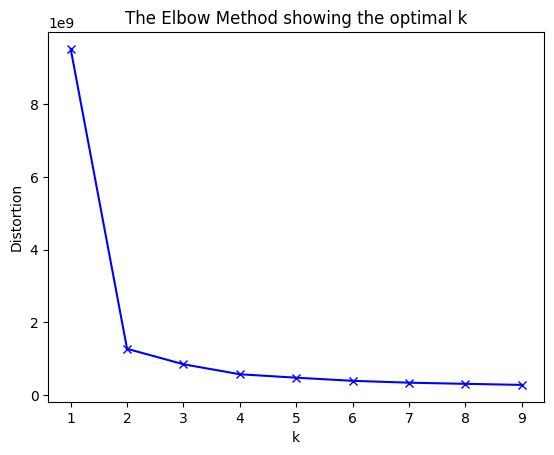

In [8]:
# Graficar el método del codo
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
# Aplicar el método k-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=3) # El número de clusters puede variar
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

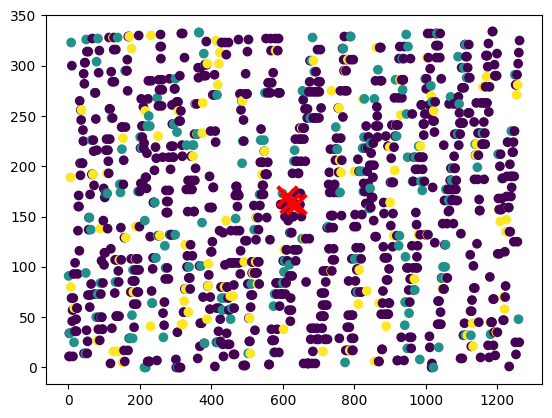

In [10]:
# Graficar los resultados
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3,
            color='r', zorder=10)
plt.show()

In [11]:
# Mostrar los centroides y sus distancias
print("Centroides:")
print(kmeans.cluster_centers_)
print("Distancias:")
print(kmeans.transform(df))

Centroides:
[[ 6.36223784e+02  1.62914595e+02  2.46367568e+01  2.02000000e+03
   2.85513514e+01  1.05297297e+00  5.09189189e-01  1.70000000e+02
   6.78140541e+01  2.74330811e+02  1.01945946e+00  9.85388108e+03
   7.92432432e-01  1.88475676e+01  1.99243243e+00  1.99243243e+00
   1.98270270e+00  1.99783784e+00  1.97621622e+00  1.99891892e+00
   1.99675676e+00  1.99135135e+00  1.63430270e+02  1.62703784e+02
   1.76000000e+00  1.00000000e+00  6.01251892e+02  1.90486486e+00
   1.00216216e+00  1.15783784e+00  1.55027027e+00  1.15675676e+00
   1.30810811e+00  1.46378378e+00  1.82486486e+00  1.82918919e+00
   1.88216216e+00  1.98702703e+00  1.98918919e+00  1.99567568e+00
   1.97297297e+00  1.99675676e+00  1.89621622e+00  1.98810811e+00
   1.96972973e+00  4.37837838e-01  7.07783595e+00 -7.30953280e+01]
 [ 6.10559406e+02  1.70673267e+02  2.60049505e+01  2.02000000e+03
   3.36633663e+01  1.00000000e+00  5.14851485e-01  1.70000000e+02
   6.80000000e+01  2.71326733e+02  1.00495050e+00  2.94693564e+